In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

data.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary=('Salary', 'min'),
    median_salary=('Salary', 'median'),
    max_salary=('Salary', 'max'),
    average_salary=('Salary', 'mean')
)

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#code here
data['TermReason'].value_counts().nlargest(5).rename('total_termination')

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [ ]:
data.RecruitmentSource[data['PerformanceScore']=='Exceeds'].value_counts().rename('total_rectuit').sort_values(ascending=False)

,total_rectuit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
data.groupby('Department')['ManagerName'].nunique().rename('total_manager')

,total_manager
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here
term_ratio = data.groupby('Sex')['Termd'].value_counts(normalize=True)
print(term_ratio)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: proportion, dtype: float64


# Create an EDA and Data Visualization Question

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


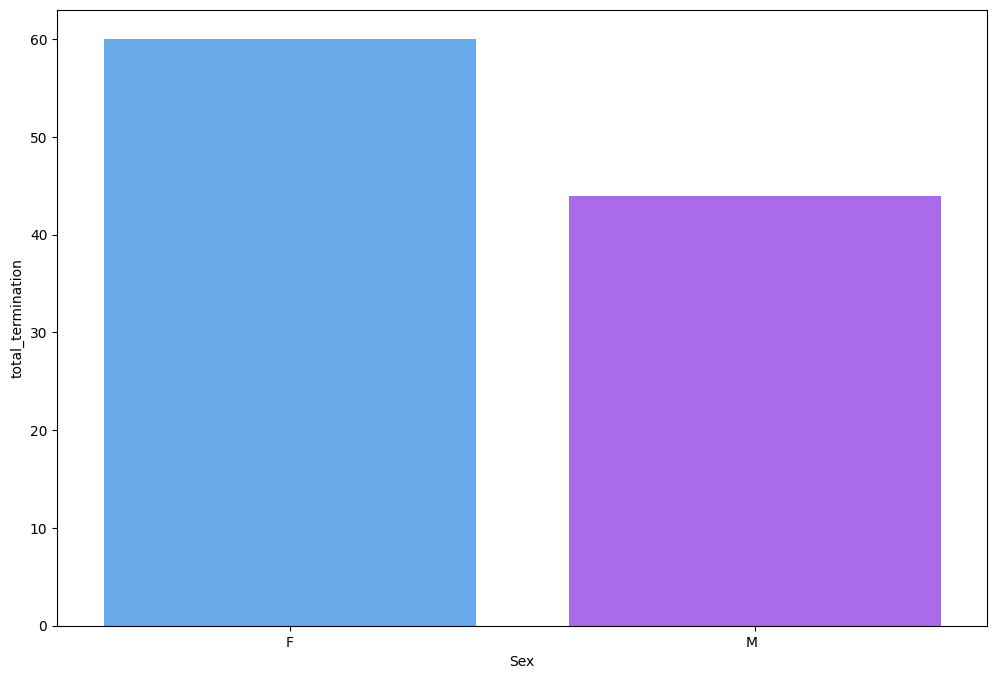

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

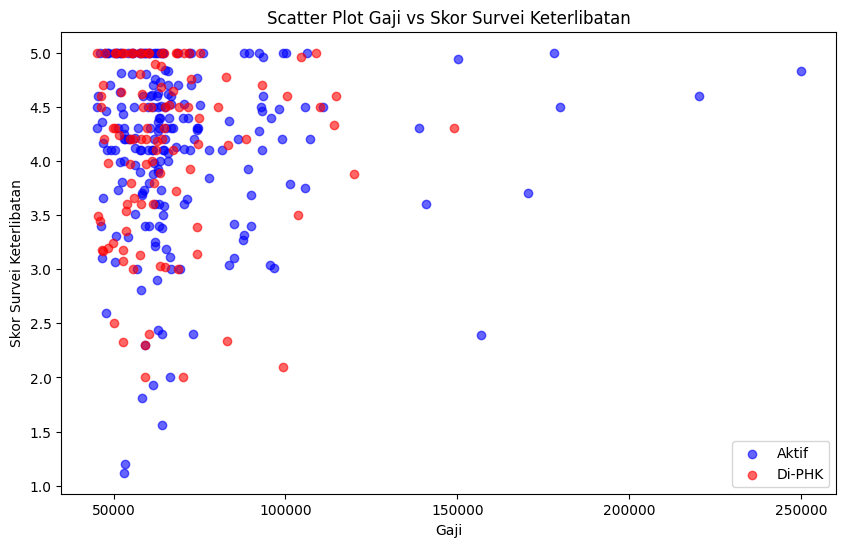

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Membuat scatter plot
plt.figure(figsize=(10, 6))

# Plot untuk karyawan yang masih aktif (Termd = 0)
plt.scatter(data[data['Termd'] == 0]['Salary'],
            data[data['Termd'] == 0]['EngagementSurvey'],
            color='blue', label='Aktif', alpha=0.6)

# Plot untuk karyawan yang sudah di-PHK (Termd = 1)
plt.scatter(data[data['Termd'] == 1]['Salary'],
            data[data['Termd'] == 1]['EngagementSurvey'],
            color='red', label='Di-PHK', alpha=0.6)

plt.xlabel('Gaji')
plt.ylabel('Skor Survei Keterlibatan')
plt.title('Scatter Plot Gaji vs Skor Survei Keterlibatan')
plt.legend()

# Menampilkan plot
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

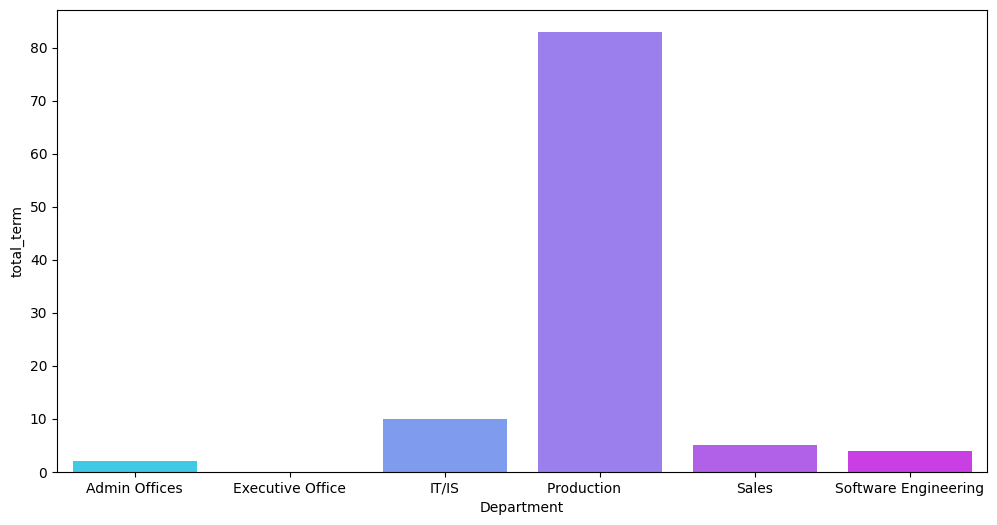

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

term_dep = data.groupby('Department').agg(total_term=('Termd', 'sum')).reset_index()

f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(x='Department', y='total_term', hue='Department', data=term_dep, palette='cool')

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

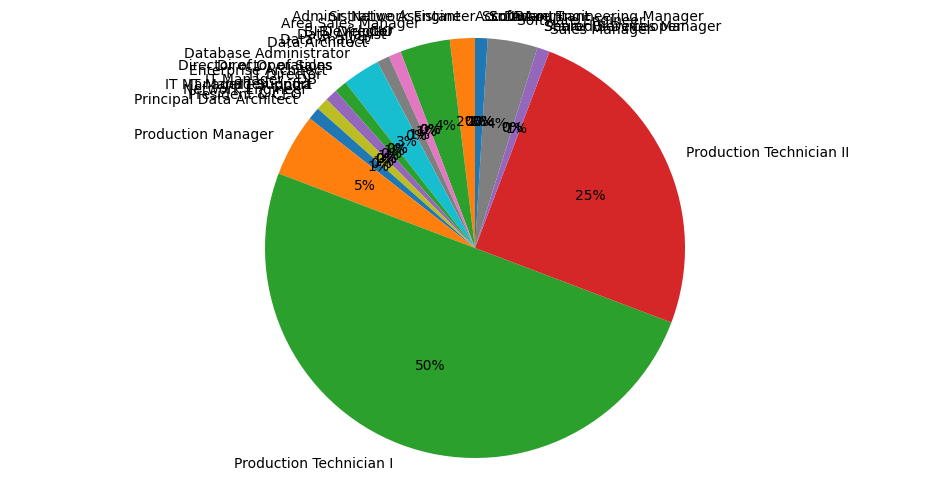

In [ ]:
term_pos = data.groupby('Position').agg(total_term=('Termd', 'sum')).reset_index()

plt.figure(figsize=(12, 6))
plt.pie(term_pos['total_term'], labels=term_pos['Position'],
        autopct='%1.0f%%',
        startangle=90)
plt.axis('equal')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

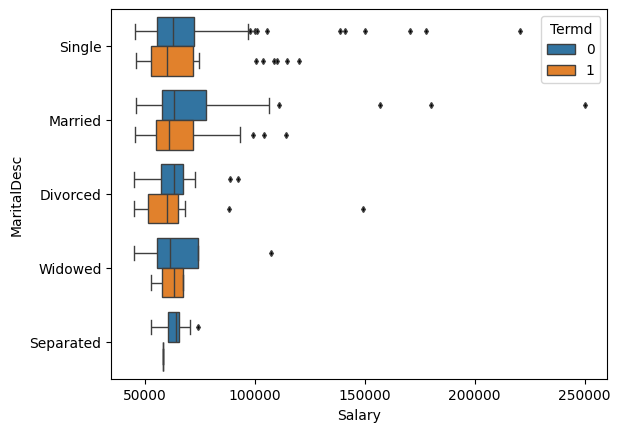

In [ ]:
#code here
import seaborn as sns
flierprops = dict (marker='d', markerfacecolor='black', markersize=3)
sns.boxplot(data=data, x='Salary', y='MaritalDesc', hue='Termd', flierprops=flierprops)

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

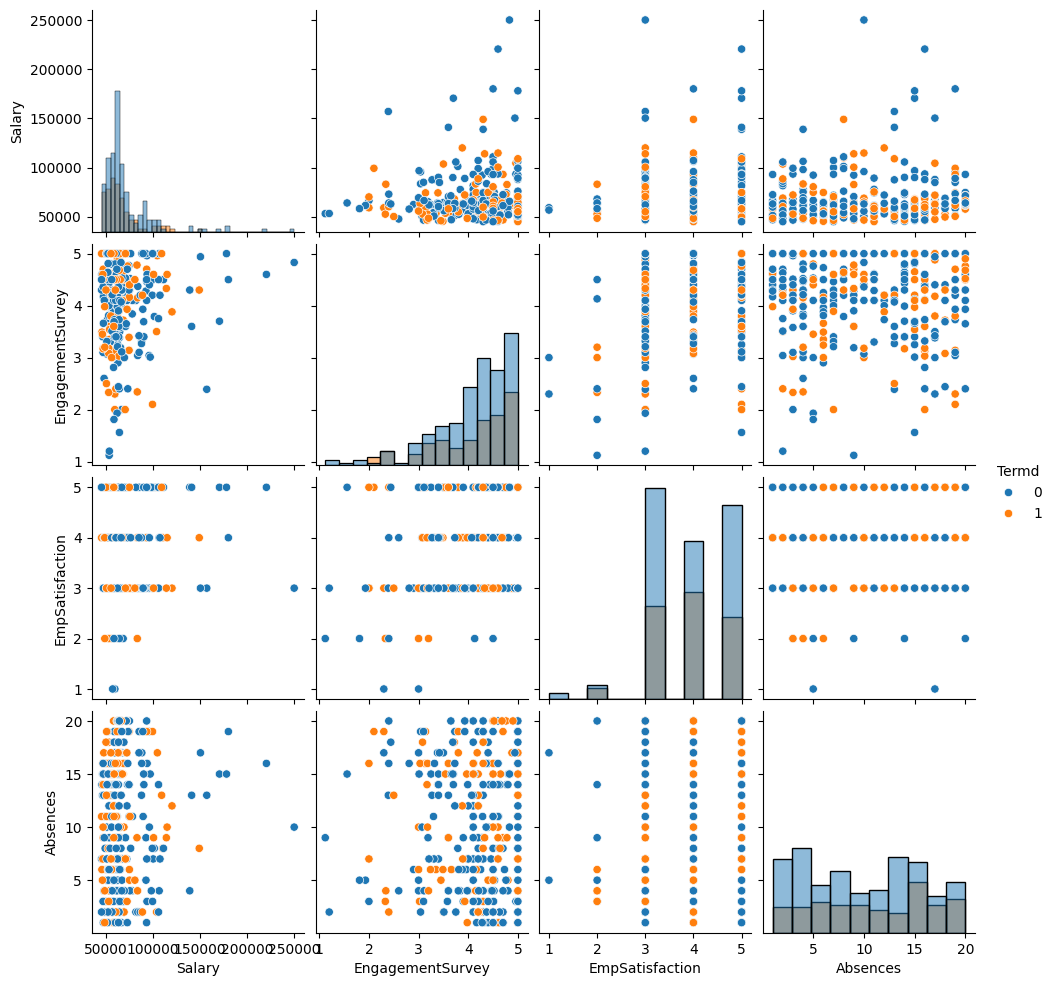

In [ ]:
#codde here
sns.pairplot(data=data, hue='Termd', vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], diag_kind='hist')

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
 Pada data tidak diketahui riwayat manager setiap employee, yang bisa diketahui dari data hanyalah manager seorang employee pada saat ini. sehingga kita tidak bisa menentukan apakah manager memiliki korelasi dengan performance seseorang atau tidak. Pada data juga tidak ditemukan apa saja yang menjadi faktor-faktor penilaian performance score sehingga tidak dapat dipastikan apa saja yang menjadi penilaian setiap manager. Tetapi kita memiliki kemungkinan melalui perbandingan jumlah anggota tim yang "melebihi ekspektasi" (Exceeds) dan "sepenuhnya memenuhi ekspektasi" (Fully Meets) pada tabel. Manajer yang memiliki lebih banyak anggota dengan skor "Exceeds" dan "Fully Meets" dianggap memimpin tim dengan performa yang lebih baik, sedangkan manajer dengan lebih sedikit anggota di kategori tersebut dianggap memiliki tim dengan performa yang lebih rendah.

 <br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>
Berdasarkan hasil perhitungan rasio antara Terminasi dan Jumlah recruitment berdasarkan RecruitmentSource, maka didapat rasio terminasi yang paling rendah adalah dari Website. Sehingga Recruitment Source yang paling baik (jika melihat dari rasio) adalah dari Website (7,69%)

In [ ]:
#12
#bandingkan jumlah terminasi per Recruitment Source dengan Total recruitment per Recruitment source

#jumlah terminasi tiap recruitment source
data =  pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
term_recruitment = data.groupby(by=['RecruitmentSource'])\
                        .agg(total_termination=('Termd','sum'))
print('JUMLAH TERMINASI BERDASARKAN RECRUITMENT SOURCE\n')
print(term_recruitment)

JUMLAH TERMINASI BERDASARKAN RECRUITMENT SOURCE

                         total_termination
RecruitmentSource                         
CareerBuilder                           11
Diversity Job Fair                      16
Employee Referral                        5
Google Search                           30
Indeed                                  21
LinkedIn                                18
On-line Web application                  1
Other                                    1
Website                                  1


In [ ]:
#jumlah recruitment dari tiap recruitment source
recruitment_source = data['RecruitmentSource'].value_counts()
print('\nJUMLAH RECRUITMENT BERDASARKAN RECRUITMENT SOURCE\n')
print(recruitment_source)


JUMLAH RECRUITMENT BERDASARKAN RECRUITMENT SOURCE

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [ ]:
#hitung rasio => membandingkan jumlah terminasi dengan jumlah recruitment berdasarkan recruitment source
ratio = term_recruitment['total_termination'] / recruitment_source
print('\nRASIO\n')
print(ratio)


RASIO

RecruitmentSource
CareerBuilder              0.478261
Diversity Job Fair         0.551724
Employee Referral          0.161290
Google Search              0.612245
Indeed                     0.241379
LinkedIn                   0.236842
On-line Web application    1.000000
Other                      0.500000
Website                    0.076923
dtype: float64
